In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

print(df.head())
print("\nShape:", df.shape)
print("\nTarget distribution:\n", df['target'].value_counts())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

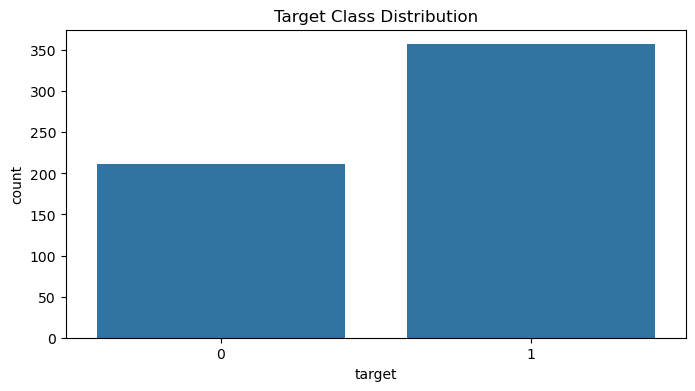

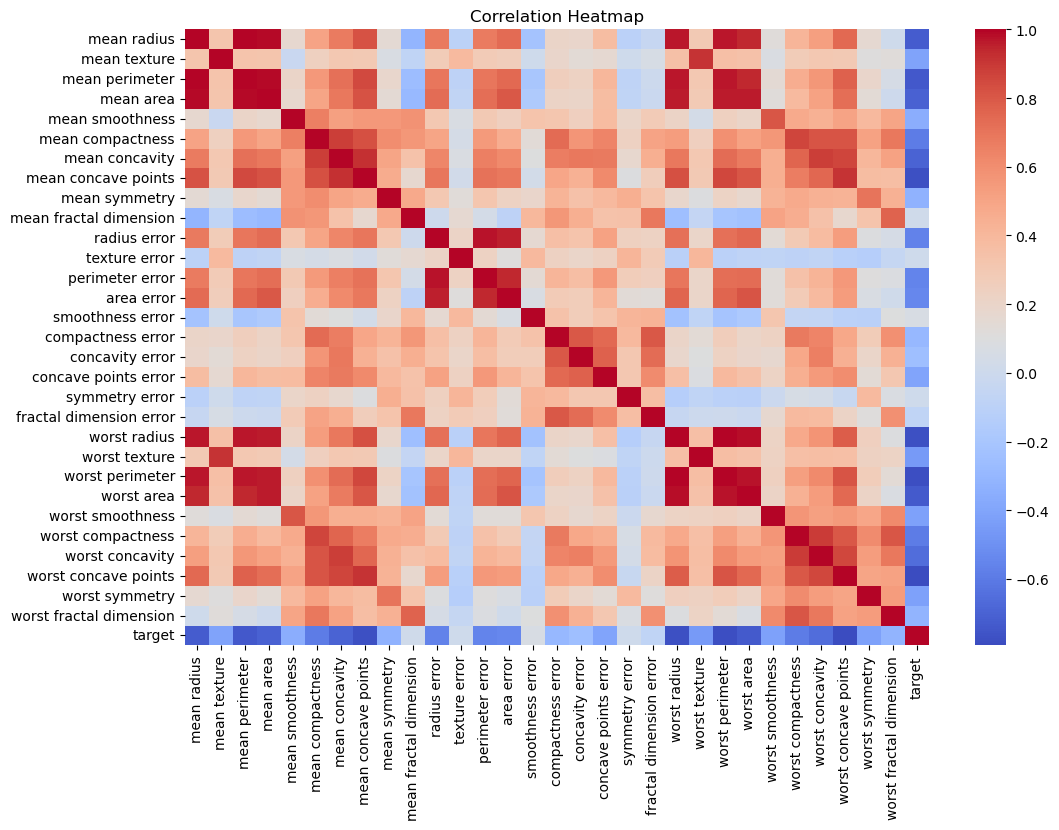

In [5]:
# EDA
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

plt.figure(figsize=(8,4))
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [7]:
# Train-Test Split & Scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# SVM with Linear Kernel
svm_linear = SVC(kernel='linear', probability=True, random_state=42)
svm_linear.fit(X_train_scaled, y_train)

y_pred_linear = svm_linear.predict(X_test_scaled)

print("Linear Kernel SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Precision:", precision_score(y_test, y_pred_linear))
print("Recall:", recall_score(y_test, y_pred_linear))
print("F1-score:", f1_score(y_test, y_pred_linear))

Linear Kernel SVM Performance:
Accuracy: 0.9736842105263158
Precision: 0.9859154929577465
Recall: 0.9722222222222222
F1-score: 0.9790209790209791


In [11]:
# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', probability=True, random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)

print("RBF Kernel SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Precision:", precision_score(y_test, y_pred_rbf))
print("Recall:", recall_score(y_test, y_pred_rbf))
print("F1-score:", f1_score(y_test, y_pred_rbf))

RBF Kernel SVM Performance:
Accuracy: 0.9824561403508771
Precision: 0.9861111111111112
Recall: 0.9861111111111112
F1-score: 0.9861111111111112


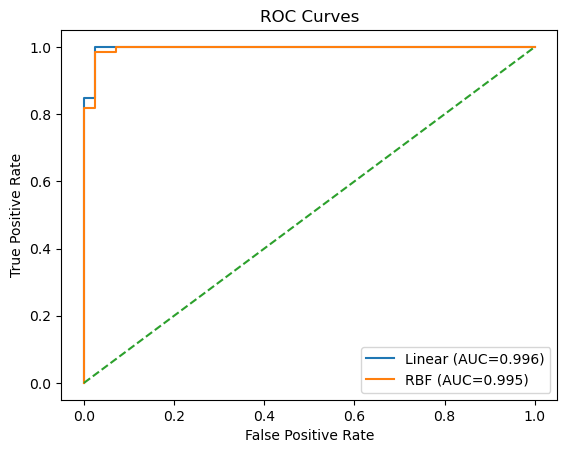

In [13]:
# ROC Curves for Linear & RBF
fpr_lin, tpr_lin, _ = roc_curve(y_test, svm_linear.predict_proba(X_test_scaled)[:, 1])
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, svm_rbf.predict_proba(X_test_scaled)[:, 1])

auc_lin = roc_auc_score(y_test, svm_linear.predict_proba(X_test_scaled)[:, 1])
auc_rbf = roc_auc_score(y_test, svm_rbf.predict_proba(X_test_scaled)[:, 1])

plt.plot(fpr_lin, tpr_lin, label=f'Linear (AUC={auc_lin:.3f})')
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF (AUC={auc_rbf:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

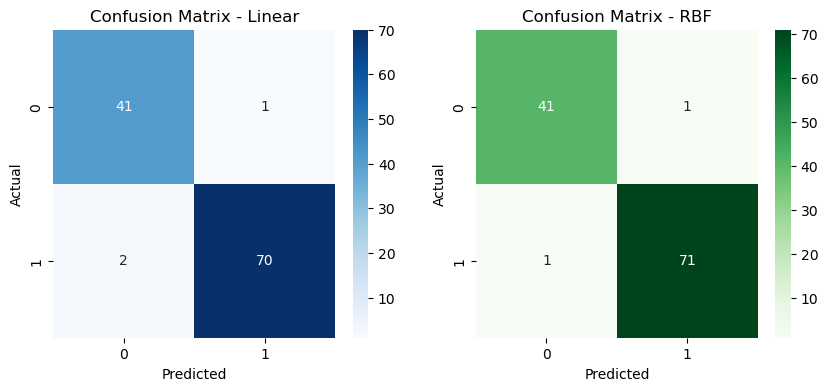

In [15]:
# Confusion Matrices
cm_lin = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(cm_lin, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Linear')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1,2,2)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - RBF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

In [17]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf']
}

grid = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

best_svm = grid.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
print("\nTest Accuracy (Best Model):", accuracy_score(y_test, y_pred_best))

Best Parameters: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Best CV Score: 0.9802197802197803

Test Accuracy (Best Model): 0.9824561403508771


In [19]:
# Cross-validation Scores
cv_scores = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')
print("CV Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

CV Scores: [0.93859649 0.94736842 0.98245614 0.92105263 0.95575221]
Mean CV Accuracy: 0.9490451793199813


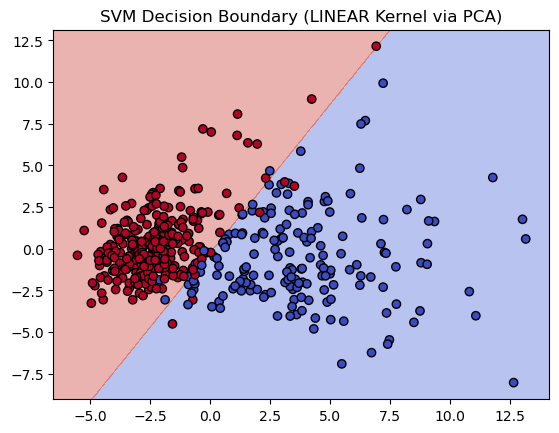

In [21]:
# Decision Boundary Visualization via PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

svm_vis = SVC(kernel=grid.best_params_['kernel'], C=grid.best_params_['C'],
              gamma=grid.best_params_['gamma'])
svm_vis.fit(X_train_pca, y_train)

# Plot decision boundary
h = 0.02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title(f"SVM Decision Boundary ({grid.best_params_['kernel'].upper()} Kernel via PCA)")
plt.show()